In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [170]:
def directs(name):
    return f'../sbart_cleaning/BehData/{name}/new_Data_P2_{name}.csv'

In [171]:
def index_splits(dataframe):
    p2id = dataframe['P2ID'].values
    
    num = [0]
    for i in range(len(dataframe)-1):
        if p2id[i] != p2id[i+1]:
            num.append(i+1)
    #print(num)
    
    return num

In [172]:
def behav(x,y):
    f = (x-y)/(x+y)
    return f

In [184]:
def beh_per_game(filename):
    
    # 0) load the dataframe
    df = pd.read_csv(filename)
    df2 = df[['Participant','P2ID','PressPump','P2_PressPump']]
    
    # 1) split up the dataframe by p2id where game ends
    
    idxs = index_splits(df2)
    results = []
    for i in range(len(idxs)-1):
        results.append(df2.iloc[idxs[i]:idxs[i+1]])
    
    
    # 2) loop over results and cum sum
    
    cumx = []
    cumy = []

    for i in range(len(results)):
        data = results[i]

        p1pump = data.PressPump
        p2pump = data.P2_PressPump

        cump1 = np.cumsum(p1pump)
        cump2 = np.cumsum(p2pump)

        cumx.append(cump1.iloc[-1])
        cumy.append(cump2.iloc[-1])
        
        #
        
        
        
        #print(len(cumx))
        #print(len(cumy))
    
    # 3) compute beh
    
    behs = []
    for i in range(len(cumx)):
        xval = cumx[i]
        yval = cumy[i]
        beh = behav(xval,yval)
        behs.append(beh)
        behs.append(-beh)
    
    
    return behs

In [ ]:
# to get the first
def beh_per_game(filename):
    
    # 0) load the dataframe
    df = pd.read_csv(filename)
    df2 = df[['Participant','P2ID','PressPump','P2_PressPump']]
    
    # 1) split up the dataframe by p2id where game ends
    
    idxs = index_splits(df2)
    results = []
    for i in range(len(idxs)-1):
        results.append(df2.iloc[idxs[i]:idxs[i+1]])
    
    
    # 2) loop over results and cum sum
    
    cumx = []
    cumy = []


    data = results[0]

    p1pump = data.PressPump
    p2pump = data.P2_PressPump

    cump1 = np.cumsum(p1pump)
    cump2 = np.cumsum(p2pump)

    cumx.append(cump1.iloc[-1])
    cumy.append(cump2.iloc[-1])
        
        #
        
        
        
        #print(len(cumx))
        #print(len(cumy))
    
    # 3) compute beh
    
    behs = []
    for i in range(len(cumx)):
        xval = cumx[i]
        yval = cumy[i]
        beh = behav(xval,yval)
        behs.append(beh)
        behs.append(-beh)
    
    
    return behs

In [185]:
def beh_per_game_for_all_players():
    array = []
    
    names = glob('../sbart_cleaning/BehData/*')
    for fname in names:
        pfname = fname[26:]
        #print(pfname)
        filename = directs(pfname)
        #print(filename)
        #processed = process_file(filename)
        #cum_sum(resu(p2info(process_file(filename))))
        
        array.append(beh_per_game(filename))
        
    return array
    

In [186]:
results = beh_per_game_for_all_players()

/tmp/ipykernel_4733/3331885184.py:2: RuntimeWarning: invalid value encountered in double_scalars
  f = (x-y)/(x+y)


In [182]:
print(results[0])

[1.0, 1.0, 1.0, -0.14285714285714285, -0.5, 1.0, -0.4666666666666667, -0.7142857142857143, 1.0, -0.2727272727272727, 0.0, -0.8181818181818182, 1.0, 0.3333333333333333, -0.75, 0.0, -0.75, nan, 1.0, nan, 0.13333333333333333, -0.3125, 0.42857142857142855, -0.42857142857142855, -0.05555555555555555, 1.0, -0.6666666666666666, -0.047619047619047616, -0.4222222222222222, 0.5, 0.14285714285714285, 0.14285714285714285, nan, 1.0, nan, -0.4666666666666667, 0.75, -0.6666666666666666, 0.0, 0.3333333333333333, -0.42857142857142855, 0.0, 1.0, -0.5102040816326531, -0.6666666666666666, -0.5, 1.0, -0.5294117647058824, 0.0, 0.4444444444444444, -0.3, nan, 1.0]


In [187]:
print(len(results))

129


In [165]:
# plot the numbers

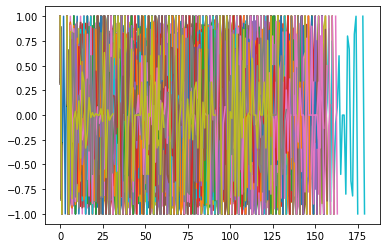

In [188]:
plt.figure()
for i in range(len(results)):
    plt.plot(results[i])

In [195]:
#histogram
histdata = []
for i in range(len(results)):
    mask = ~np.isnan(results[i])
    newr = np.array(results[i])[mask]
    histdata.extend(newr)
#print(histdata)

In [199]:
#np.mean(histdata)
np.std(histdata)

0.6365551041793035

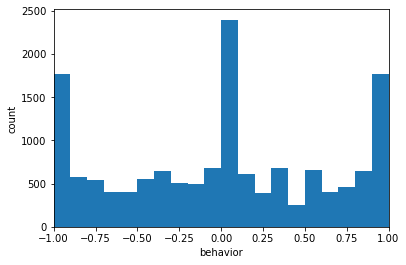

In [196]:
plt.figure()
plt.hist(histdata, bins=20)
plt.ylabel('count')
plt.xlabel('behavior')
plt.xlim(-1,1)
plt.savefig('figs/behav_hist')

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[1768  573  540  400  403  552  646  510  497  676 2394  608  396  677
  257  656  400  465  648 1768]


(-1.0, 1.0)

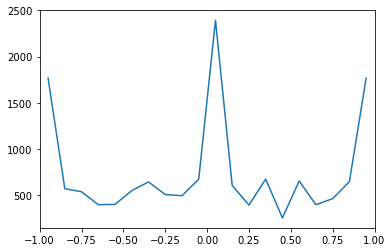

In [197]:
freqs, bins = np.histogram(histdata, bins=20)

print(bins)
print(freqs)

bin_centers = (bins[1:] + bins[:-1]) / 2

plt.figure()
plt.plot(bin_centers, freqs, '-')
plt.xlim(-1, 1)

In [200]:
mask = ~np.isnan(results[0])
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False  True  True]


In [201]:
# shifting histogram
newr = []
for i in range(len(results)):
    mask = ~np.isnan(results[i])
    newr.append(np.array(results[i])[mask])

In [204]:
first = []
second = []
third = []
for i in range(len(newr)):
    first.extend(newr[i][0:20])
    second.extend(newr[i][20:40])
    if len(newr[i])>40:
        third.extend(newr[i][40:60])

[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
[378 133 111  89 143 135 218 366 147 133 104  95 143 385]


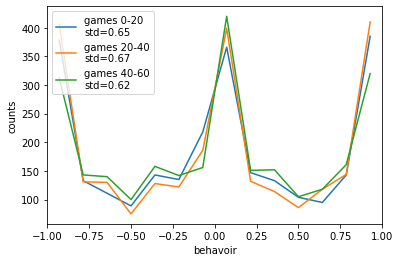

In [207]:
freqs, bins = np.histogram(first, bins=14)
freqs2, bins2 = np.histogram(second, bins=14)
freqs3, bins3 = np.histogram(third, bins=14)

print(bins)
print(freqs)

bin_centers = (bins[1:] + bins[:-1]) / 2
bin_centers2 = (bins2[1:] + bins2[:-1]) / 2 
bin_centers3 = (bins3[1:] + bins3[:-1]) / 2
plt.figure()
plt.plot(bin_centers, freqs, '-')
plt.plot(bin_centers2, freqs2, '-')
plt.plot(bin_centers3, freqs3, '-')
plt.legend([f'games 0-20\nstd={np.std(first):.2f}',
            f'games 20-40\nstd={np.std(second):.2f}',
            f'games 40-60\nstd={np.std(third):.2f}'], loc=2)
plt.xlim(-1, 1)
plt.xlabel('behavoir')
plt.ylabel('counts')
plt.savefig('figs/beh_over_time')

(array([ 3.,  2.,  8., 10., 13.,  7., 18., 16., 12.,  8., 10.,  4.,  4.,
         2.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.1857366 , -0.12644977, -0.06716294, -0.00787611,  0.05141072,
         0.11069755,  0.16998438,  0.22927121,  0.28855804,  0.34784487,
         0.4071317 ,  0.46641853,  0.52570536,  0.58499219,  0.64427902,
         0.70356585,  0.76285268,  0.82213951,  0.88142634,  0.94071317,
         1.        ]),
 <BarContainer object of 20 artists>)

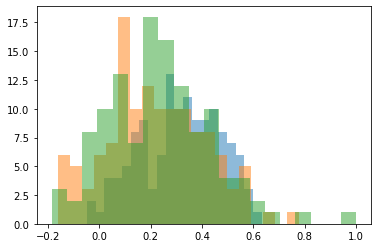

In [129]:
plt.figure()
plt.hist(first, bins=20, alpha=0.5)
plt.hist(second, bins=20, alpha=0.5)
plt.hist(third, bins=20, alpha=0.5)

In [ ]:
# which participant is computer??
